1.8491407972073937


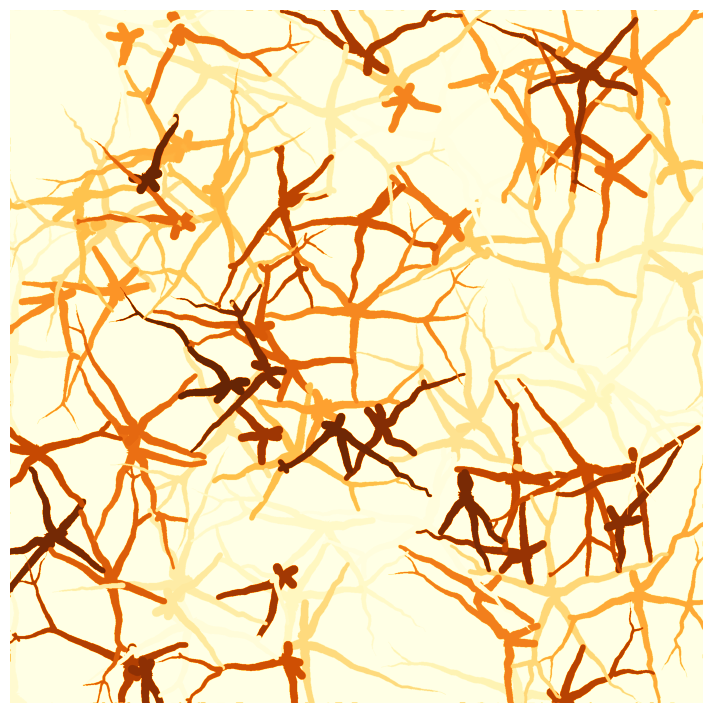

In [4]:
from NNIS.network_generation import bn
import numpy as np
import matplotlib.pyplot as plt
from FF.image_processing import measure_D


neuron_params = {
    'depth': 3,
    'mean_soma_radius': 20,
    'std_soma_radius': 3,
    'D': 1.2,
    'branch_angle': np.pi / 3,
    'mean_branches': 1.5,
    'weave_type': 'Gauss',
    'randomness': 0.1,
    'curviness': 'Gauss',
    'curviness_magnitude': 1,
    'n_primary_dendrites': 5,
    'initial_thickness': 25,
    'total_length': 400,
    'pass_through_probability': 0.25
}

network_params = {
    'width': 2048,
    'height': 2048,
    'num_neurons': 80,
    'edge_margin': 50
}

testnet = bn.generate_network(network_id = 'nntest', neuron_params=neuron_params, network_params=network_params)

net_masks = testnet.generate_binary_mask()
net_mask_filled = net_masks['filled']
net_mask_outline = net_masks['outline']


min_size= 32
max_size=min_size*10

print(measure_D(net_mask_outline, min_size=min_size, max_size=max_size, n_sizes=200, invert=False, plot_image=False));


plt.figure(figsize=(9,9))
plt.imshow(net_mask_filled, cmap='YlOrBr')
plt.axis('off');


#print(measure_D(no_soma, min_size=8, max_size= np.shape(net_mask)[0]/5, n_sizes=20, invert=False, plot_image= True));

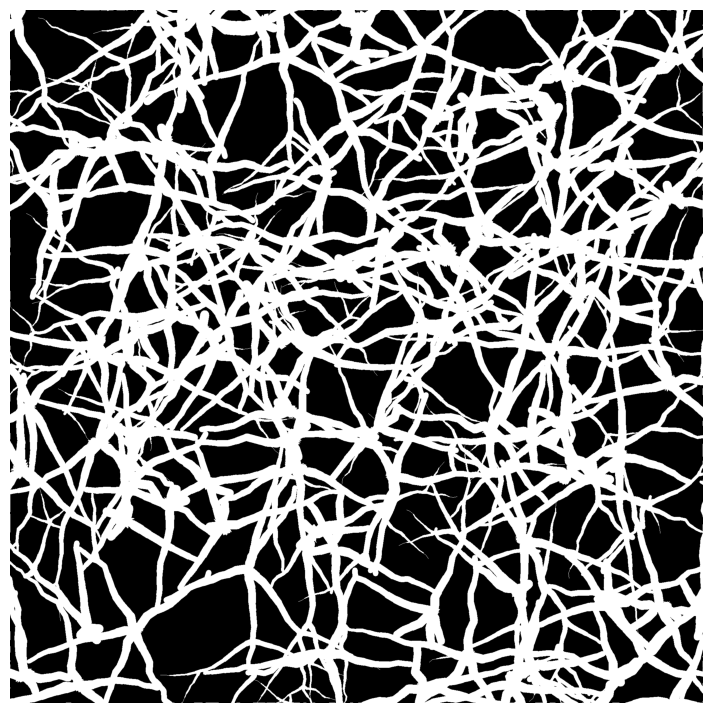

In [2]:

binv = net_mask_filled * 255  
binv = np.clip(binv, 0, 255)  

plt.figure(figsize=(9,9))
plt.imshow(binv, cmap='gray')
plt.axis('off');
